# Bonus  example: initial conditions generation 


Here, we present a simple example of the usage of the python module IC4popsyn (https://github.com/GiacobboNicola/IC4popsyn ).

The module generate binaries given an IMF and a distribution for periods and eccentricity. 
It can directly save the generates systems in the SEVN input format

## Options for binary generation

By now we have implemented two models:
1. `sana12`: it's based on [*Sana+12*](https://ui.adsabs.harvard.edu/abs/2012Sci...337..444S/abstract)
2. `sana_eccm&ds`: it's still based on *Sana+12* but the eccentricity are compute following eq. 3 in [M&DS2017](https://iopscience.iop.org/article/10.3847/1538-4365/aa6fb6/pdf).

However, there are many options that allow the user to build it own model. Here are listed the default values of each parameter that can be customized. 
* `alphas` = [-1.3,-2.3]: represents the slope of the broken power-law used as IMF.    
* `mass_ranges` = [0.1,0.5,150]: identify the mass ranges of the different power-laws (note that *dim(mass_range) = dim(alphas) + 1*).  
* `logP_min` = 0.15: lower limit for the period.  
* `logP_max` = 5.5: upper limit for the period. 
* `logP_slope` = -0.55: exponent of the power-law.  
* `e_min` = 0.0: lower limit for the eccentricity.  
* `e_max` = 0.9999: upper limit for the eccentricity.  
* `e_slope` = -0.45: exponent of the power-law. 
* `q_min` = 0.1: lower limit for the mass ratio.   
* `q_max` = 1.0: upper limit for the mass ratio.  
* `q_slope` = -0.1: exponent of the power-law.  
* `mass_min` = 0.1: minimum mass of the secondary.  

You can change each paramenter passing it to function as input `parameter=value` (see `example.py` for an application).

***NOTE:** Adopting `sana_eccm&ds` model, periods are forced to be longer than 2 days (see the [image](img/eccM&DS.png) below).*

## Options for saving in the SEVN input format 

In addition to the filename, the user can set the other properties of the SEVN run:

* `z1` = None: metallicity of the first star     
* `z2` = None: metallicity of the second star   
* `o1` = 0.0: lower limit for the period.  
* `o2` = 0.0: upper limit for the period. 
* `tend` = None: exponent of the power-law.  
* `tstart1` = None: lower limit for the eccentricity.  
* `sn1` = None: upper limit for the eccentricity.  
* `sn2` = None: exponent of the power-law. 
* `dtout` = None: lower limit for the mass ratio.   
* `tstart2` = None: upper limit for the mass ratio.  

For all the parameters except o1 and o2, the default value is None. In this case the file in output will have the placeholder string XXX. This string is recognised by SEVN and it means that the given property must be set as runtime parameter (i.e. the runtime parameter cannot be 0)

Building a population of binaries based on Sana+2012 and Kroupa2001


m1   m2             p       ecc            a
0   0.224115  2.0      6.355120  0.943746    18.839983
1   0.166014  2.0      1.936065  0.037150     8.454981
2   0.114367  2.0   8874.671747  0.100477  2314.411560
3   0.155690  2.0      1.692476  0.250657     7.717728
4   0.311285  2.0   1645.774451  0.148543   775.312772
..       ...  ...           ...       ...          ...
95  0.139623  2.0      7.331567  0.243033    20.457656
96  0.689671  2.0     62.154733  0.534242    91.796918
97  0.175226  2.0  49292.090041  0.457964  7327.657908
98  0.210474  2.0      5.830952  0.131420    17.752808
99  0.409830  2.0  73432.800844  0.084760  9890.108954

[100 rows x 5 columns]

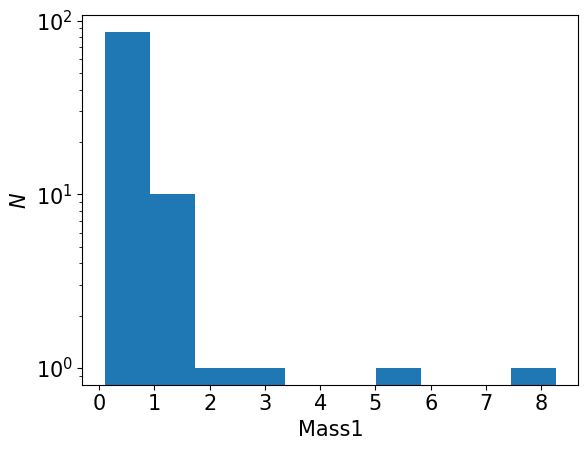

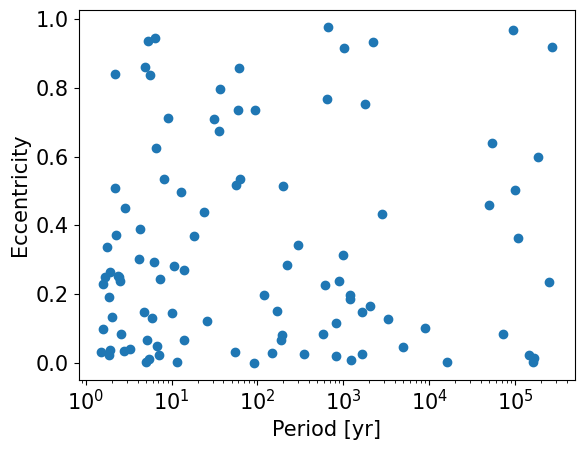

In [30]:
#Import the generator
from ic4popsyn import populations as pop
import matplotlib.pyplot as plt 

# Number of systems to generate
Nbin = 100

# create a population of binaries (Example for Kroupa IMF and Sana12 distribution for Period and Eccentricty)
binaries = pop.Binaries(Nbin, model='sana12', 
                       mass_ranges=[0.1,0.5,150.], 
                       alphas=[-1.3,-2.3],
                       logP_min=0.15,
                      logP_max=5.5,
                      logP_slope=-0.55,
                      e_min=0,
                      e_max=0.99,
                      e_slope=-0.45,
                      q_min=0.1,
                      q_max=1.0,
                      q_slope=-0.1,
                      mass_min=2
                      )

#binary.population is a pandas Dataframe containing the properties of  the generated binaries
display(binaries.population)


plt.hist(binaries.population.m1,bins=10)
plt.yscale("log")
plt.xlabel("Mass1",fontsize=15)
plt.ylabel("$N$",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

plt.scatter(binaries.population.p,binaries.population.ecc)
plt.xscale("log")
plt.xlabel("Period [yr]",fontsize=15)
plt.ylabel("Eccentricity",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [31]:

#Save them in the SEVN input format
binaries.save_sevn_input('listBin', 
                         z1=0.02, 
                         z2=0.02, 
                         o1=0.0, 
                         o2=0.0, 
                         tend='end', 
                         tstart1="zams", 
                         sn1='delayed',
                         sn2='delayed', 
                         dtout='end',
                         tstart2='zams'
                          )

#Save a SEVN input format with placeholder
binaries.save_sevn_input('listBin_placeholder')